🏅 Olympics Data Analysis & Medal Prediction (1976–2008)
This document contains the full code for data analysis, visualization, and machine learning on the Summer Olympics medal dataset.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib

df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin1")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


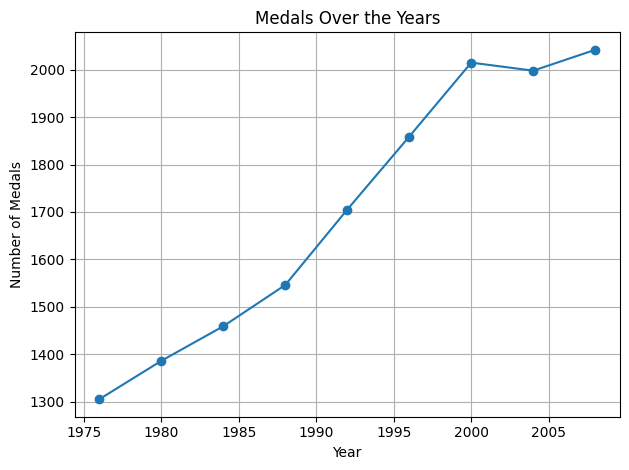

In [16]:
medals_by_year = df['Year'].value_counts().sort_index()
plt.plot(medals_by_year.index, medals_by_year.values, marker='o')
plt.title("Medals Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.tight_layout()
plt.show()

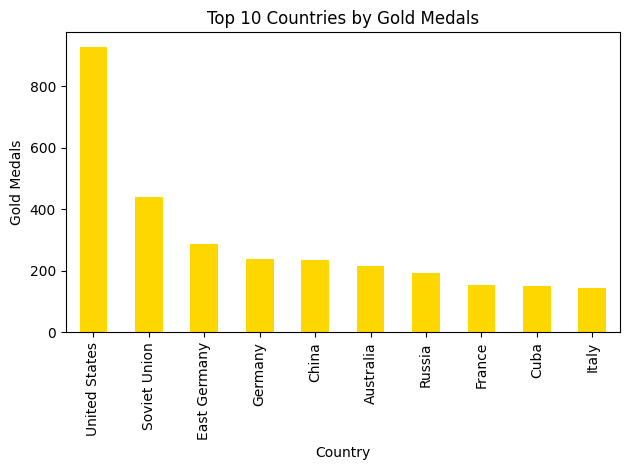

In [17]:
gold_df = df[df['Medal'] == 'Gold']
top_gold = gold_df['Country'].value_counts().head(10)
top_gold.plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Gold Medals")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.tight_layout()
plt.show()

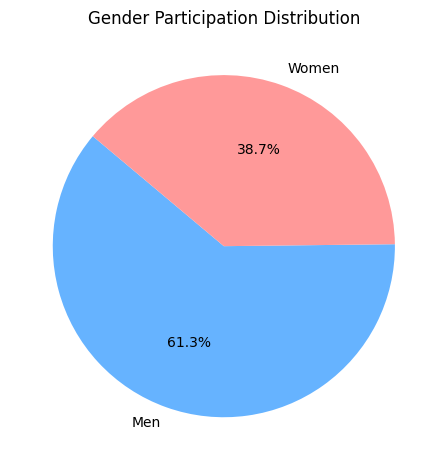

In [18]:
gender_dist = df['Gender'].value_counts()
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140)
plt.title("Gender Participation Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

In [19]:
le = LabelEncoder()
df['Medal_encoded'] = le.fit_transform(df['Medal'])

X = pd.get_dummies(df[['Country', 'Sport', 'Year']], drop_first=True)
y = df['Medal_encoded']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.6301012079660464
              precision    recall  f1-score   support

      Bronze       0.66      0.64      0.65      1054
        Gold       0.62      0.67      0.65       998
      Silver       0.61      0.58      0.60      1011

    accuracy                           0.63      3063
   macro avg       0.63      0.63      0.63      3063
weighted avg       0.63      0.63      0.63      3063



In [22]:
joblib.dump(model, "olympics_medal_predictor.pkl")
joblib.dump(le, "medal_label_encoder.pkl")

['medal_label_encoder.pkl']